# **Blood Transfusion Service Center**
-------
Blood Transfusion Service Center Data Set
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database. [link](https://www.openml.org/d/1464)

V1: Recency - months since last donation

V2: Frequency - total number of donation

V3: Monetary - total blood donated in c.c.

V4: Time - months since first donation)a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
#lendo o csv que se encontra no link informado
blood_transf = pd.read_csv('https://www.openml.org/data/get_csv/1586225/php0iVrYT.csv')

In [99]:
blood_transf.head(10) #lendo as 10 primeiras linhas

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
5,4,4,1000,4,1
6,2,7,1750,14,2
7,1,12,3000,35,1
8,2,9,2250,22,2
9,5,46,11500,98,2


# **Conhecendo o Dataset**

In [100]:
#resumo estatístico do dataset
blood_transf.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [101]:
blood_transf['Class'].value_counts()

1    570
2    178
Name: Class, dtype: int64

In [102]:
blood_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [103]:
#verificando as linhas e colunas
blood_transf.shape

(748, 5)

In [104]:
#verificando se há valores nulos no dataset
blood_transf.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [105]:
corr = blood_transf.corr()

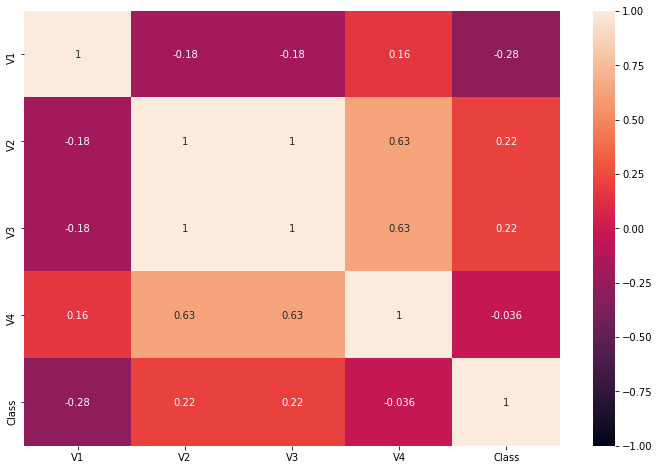

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1)
plt.show()

In [107]:
#blood_transf.drop('V2', axis=1, inplace=True)

In [108]:
# armazenando os labels em um array
labels = np.array(blood_transf['Class'])

In [109]:
#removendo a classe do dataset original
blood_transf.drop('Class', axis=1, inplace=True)

#check
blood_transf.columns

Index(['V1', 'V2', 'V3', 'V4'], dtype='object')

In [110]:
# convertendo df para array
data = np.array(blood_transf)

In [111]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ],
       [-1.0515084 ,  1.79684161,  1.79684161,  0.02947053],
       ...,
       [ 1.66790417, -0.43093957, -0.43093957,  1.13782607],
       [ 3.64565877, -0.77367514, -0.77367514,  0.19367135],
       [ 7.72477762, -0.77367514, -0.77367514,  1.54832812]])

In [112]:
#fazendo a divisão estratificada do conjunto de dados de treino e teste
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in skf.split(data, labels):
  x_train, x_test = data[train_index], data[test_index]
  y_train, y_test = labels[train_index], labels[test_index]


# SVM

In [113]:
from sklearn.svm import SVC

#instanciando o modelo
SVC(C=0.20584494295802447, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

#treinando o modelo
svc_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [114]:
y_pred = svc_clf.predict(x_test)

In [115]:
#avaliando o modelo 
from sklearn import metrics

print('Matriz de Confusão\n', metrics.confusion_matrix(y_test, y_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_pred)) 
print('\nF1\n', metrics.f1_score(y_test, y_pred))
print('\nAUCROC\n', metrics.roc_auc_score(y_test, y_pred))

Matriz de Confusão
 [[183   7]
 [ 54   5]]

Acurácia
 0.7550200803212851

F1
 0.8571428571428571

AUCROC
 0.5239518287243532


Tunando o modelo

In [116]:
#definindo o tipo de validacao cruzada e o numero de folds
cv_strat = StratifiedKFold(n_splits=3)

In [117]:
#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

In [118]:
#instanciando o modelo
svc = SVC()

In [119]:
#tunando o modelo
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer
from scipy.stats import uniform

#definindo os hiperparametros
hiperparam = {
    'C': uniform(loc=0, scale=10),
    'kernel': ['rbf', 'sigmoid'],
    'gamma':['scale', 'auto']

}
#instanciando e modelando o random search com os hiperparametros e a validação definidas.
random_svc = RandomizedSearchCV(svc, hiperparam, n_iter=10, scoring=f1, cv=cv_strat, random_state=42)
random_svc.fit(data, labels)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0711518828>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=mak

In [120]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', random_svc.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', random_svc.best_params_)

print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', random_svc.best_estimator_)

Melhor resultado f1: 0.8649478843100712


Melhor configuração de hiperparâmetros: {'C': 0.20584494295802447, 'gamma': 'auto', 'kernel': 'sigmoid'}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: 
 SVC(C=0.20584494295802447, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=213,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [122]:
#treinando o modelo
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=213,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
#realizando as predições
y_pred = clf_rf.predict(x_test)

In [124]:
#avaliando o modelo
print('Matriz de Confusão\n', metrics.confusion_matrix(y_test, y_pred)) 
print('\nAcurácia\n', metrics.accuracy_score(y_test, y_pred)) 
print('\nF1\n', metrics.f1_score(y_test, y_pred))
print('\nAUCROC\n', metrics.roc_auc_score(y_test, y_pred))

Matriz de Confusão
 [[190   0]
 [ 59   0]]

Acurácia
 0.7630522088353414

F1
 0.8656036446469249

AUCROC
 0.5


In [125]:
from random import randint
#definindo hiperparametros
hiperparam_rf = {
    'n_estimators': [randint(100, 500)],
    'criterion': ['gini','entropy'],
    'bootstrap': [True, False],
    'max_depth': [randint(0, 6)]
}

#instanciando o modelo
rf = RandomForestClassifier()

random_rf = RandomizedSearchCV(rf, hiperparam_rf, n_iter=10, scoring=f1, cv=cv_strat, random_state=42)
random_rf.fit(data, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [126]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', random_rf.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', random_rf.best_params_)

print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', random_rf.best_estimator_)

Melhor resultado f1: 0.8649478843100712


Melhor configuração de hiperparâmetros: {'n_estimators': 493, 'max_depth': 1, 'criterion': 'gini', 'bootstrap': True}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=493,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
